# Tarea 2. Midiendo rendimiento y riesgo.

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://www.maxpixel.net/static/photo/1x/Wall-Street-Dices-Over-Newspaper-Profit-Loss-Risk-2656028.jpg" width="600px" height="400px" />

**Resumen.**
> En esta tarea descargarás datos históricos de precios y, con base en ellos, calcularás rendimientos. Luego se te pedirá resumir la distribución de rendimientos para cada instrumento calculando el rendimiento medio y volatilidad. De igual manera, se te pedirá presentar dicho resumen en una base anual.

**Criterio de revisión.**
> Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

**Antes de comenzar.**
> Por favor, copiar y pegar este archivo en otra ubicación. Antes de comenzar, nombrarlo *Tarea3_ApellidoNombre*, sin acentos y sin espacios; por ejemplo, en mi caso el archivo se llamaría *Tarea3_JimenezEsteban*. Resolver todos los puntos en dicho archivo y subir en este espacio.

## 1. Descarga de datos (10 puntos)

Descargar los precios diarios ajustados en el cierre para el índice S&P 500 (^GSPC), y para 15 compañías que compongan dicho índice, durante el periodo comprendido del primero de enero del 2015 hasta el día en que realicen la tarea.

1. Mostrar el DataFrame de los precios diarios (5 puntos).
2. Graficar los precios (5 puntos).

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

tickers = ['^GSPC','AAPL','GOOGL','MSFT','TSLA','NVDA',
          'AMZN','META','V','JNJ','KO','MCD','AXP',
          'AMD','GS','IBM']
start_date = '2015-01-01'
end_date = '2024-01-31'
df = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

[*********************100%%**********************]  16 of 16 completed


In [2]:
df

,AAPL,AMD,AMZN,AXP,GOOGL,GS,IBM,JNJ,KO,MCD,META,MSFT,NVDA,TSLA,V,^GSPC
Date,,,,,,,,,,,,,,,,
2015-01-02,24.435266,2.670000,15.426000,81.022270,26.477501,163.430496,103.354828,81.822128,31.598579,74.071373,78.449997,40.452736,4.832805,14.620667,62.132996,2058.199951
2015-01-05,23.746893,2.660000,15.109500,78.879570,25.973000,158.327682,101.728554,81.250664,31.598579,73.253296,77.190002,40.080746,4.751177,14.006000,60.761490,2020.579956
2015-01-06,23.749126,2.630000,14.764500,77.198509,25.332001,155.124817,99.534668,80.851418,31.838533,73.388306,76.150002,39.492455,4.607131,14.085333,60.369953,2002.609985
2015-01-07,24.082134,2.580000,14.921000,78.884514,25.257500,157.436630,98.884148,82.636307,32.235954,74.667061,76.150002,39.994228,4.595126,14.063333,61.178791,2025.900024
2015-01-08,25.007431,2.610000,15.023000,80.002708,25.345501,159.950180,101.033409,83.286041,32.625870,74.945023,78.180000,41.170788,4.767985,14.041333,61.999348,2062.139893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-24,194.252121,178.289993,156.869995,185.820007,148.699997,379.399994,172.358612,158.960007,58.910000,300.440002,390.700012,402.559998,613.619995,207.830002,271.144409,4868.549805
2024-01-25,193.922546,180.330002,157.750000,188.070007,151.869995,382.700012,188.709549,159.559998,59.160000,297.209991,393.179993,404.869995,616.169983,182.630005,272.102600,4894.160156
2024-01-26,192.174774,177.250000,159.119995,201.429993,152.190002,377.790009,185.726746,159.500000,59.369999,292.260010,394.140015,403.929993,610.309998,183.250000,267.441315,4890.970215


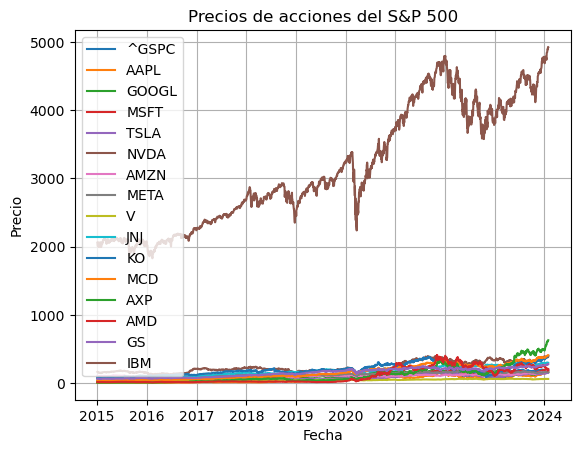

In [3]:
plt.plot(df, label=tickers)
plt.title('Precios de acciones del S&P 500')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid()

## 2. Cálculo de rendimientos diarios (20 puntos)

A partir de los precios que descargaste en el anterior punto, calcular los rendimientos porcentuales diarios.

1. Mostrar el DataFrame de los rendimientos porcentuales diarios (10 puntos).
2. Graficar los rendimientos (10 puntos).

In [4]:
rt = df.pct_change().dropna()
rt.head()

,AAPL,AMD,AMZN,AXP,GOOGL,GS,IBM,JNJ,KO,MCD,META,MSFT,NVDA,TSLA,V,^GSPC
Date,,,,,,,,,,,,,,,,
2015-01-05,-0.028171,-0.003745,-0.020517,-0.026446,-0.019054,-0.031223,-0.015735,-0.006984,0.000000,-0.011044,-0.016061,-0.009196,-0.016890,-0.042041,-0.022074,-0.018278
2015-01-06,0.000094,-0.011278,-0.022833,-0.021312,-0.024679,-0.020229,-0.021566,-0.004914,0.007594,0.001843,-0.013473,-0.014678,-0.030318,0.005664,-0.006444,-0.008893
2015-01-07,0.014022,-0.019011,0.010600,0.021840,-0.002941,0.014903,-0.006536,0.022076,0.012482,0.017425,0.000000,0.012706,-0.002606,-0.001562,0.013398,0.011630
2015-01-08,0.038423,0.011628,0.006836,0.014175,0.003484,0.015965,0.021735,0.007863,0.012096,0.003723,0.026658,0.029418,0.037618,-0.001564,0.013412,0.017888
2015-01-09,0.001073,0.007663,-0.011749,-0.012667,-0.012211,-0.015347,0.004355,-0.013629,-0.011032,-0.012187,-0.005628,-0.008405,0.004028,-0.018802,-0.014823,-0.008404


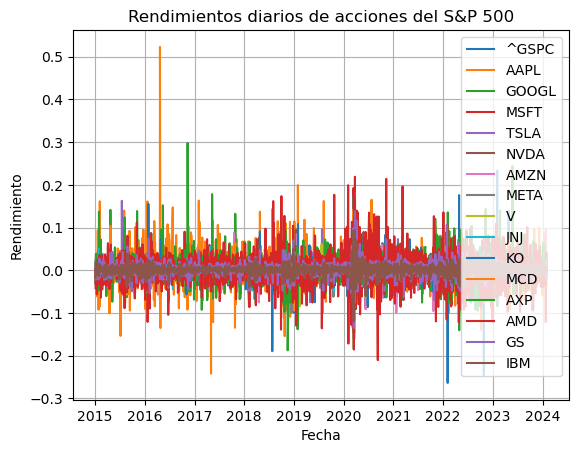

In [5]:
plt.plot(rt, label=tickers)
plt.title('Rendimientos diarios de acciones del S&P 500')
plt.xlabel('Fecha')
plt.ylabel('Rendimiento')
plt.legend()
plt.grid()

## 3. Resumen de distribución de rendimientos (30 puntos)

Con base en los rendimientos que calculaste en el punto anterior:

1. Calcular el rendimiento medio diario para el índice S&P 500 y para los demás activos. Anualizar los rendimientos (15 puntos). 

2. Calcular la volatilidad diaria para el índice S&P 500 y para los demás activos. Anualizar (15 puntos).

Por favor, reportar los resultados en DataFrames tal y como lo vimos en clase.

In [6]:
info = pd.DataFrame({
    'Volatilidad' : rt.std() * np.sqrt(252),
    'Rendimiento' : rt.mean() * 252
})

In [7]:
info.T

,AAPL,AMD,AMZN,AXP,GOOGL,GS,IBM,JNJ,KO,MCD,META,MSFT,NVDA,TSLA,V,^GSPC
Volatilidad,0.289943,0.596963,0.331748,0.315379,0.284508,0.290633,0.240190,0.183032,0.182065,0.206413,0.375004,0.277358,0.480570,0.564038,0.250486,0.182554
Rendimiento,0.267244,0.634027,0.312342,0.151190,0.232942,0.137350,0.093936,0.089959,0.087275,0.173702,0.251285,0.293809,0.651942,0.442945,0.196210,0.113058


## 4. Gráfico rendimientos esperados vs. volatilidad (40 puntos)

Graficar los rendimientos medios anuales contra las desviaciones estándar del índice S&P 500 y de los demás activos. Como vimos en clase, la volatilidad debe ir en el eje $x$ y el rendimiento esperado en el eje $y$. Se deben etiquetar los ejes y dar detalles para un completo entendimiento de la gráfica.

1. Gráfico (10 puntos).
2. Ajuste una línea recta a los puntos obtenidos. Dar la ecuación (10 puntos).
3. A partir del gráfico y de la línea recta ajustada, concluya acerca de la relación rendimiento/riesgo (específicamente acerca de $\beta_0$ y $\beta_1$) (20 puntos).

Sin interpretación esto no vale

Text(0, 0.5, 'Rendimiento')

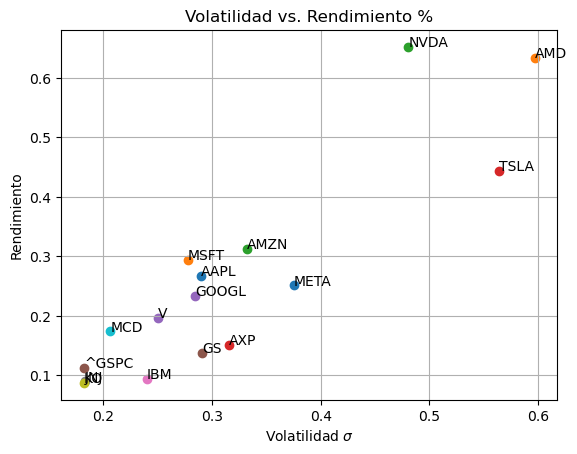

In [8]:
for i in range(len(info)):
    flag = info.iloc[i]
    plt.scatter(flag.Volatilidad, flag.Rendimiento)
    plt.text(flag.Volatilidad, flag.Rendimiento, info.index[i])
plt.grid()
plt.title('Volatilidad vs. Rendimiento %')
plt.xlabel('Volatilidad $\sigma$')
plt.ylabel('Rendimiento')

In [9]:
from sklearn.linear_model import LinearRegression
X = info[['Volatilidad']]
y = info[['Rendimiento']]

model = LinearRegression().fit(X,y)

In [10]:
model.intercept_

array([-0.13171729])

In [11]:
model.coef_

array([[1.23477277]])

In [12]:
info['Modelo']= model.predict(X)

### Ecuación de la recta

$$ Rendimiento = -0.13 + 1.23 * volatilidad $$

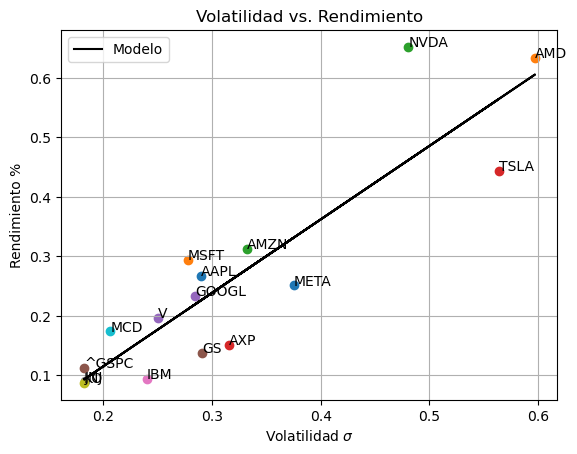

In [13]:
for i in range(len(info)):
    flag = info.iloc[i]
    plt.scatter(flag.Volatilidad, flag.Rendimiento)
    plt.text(flag.Volatilidad, flag.Rendimiento, info.index[i])
plt.grid()
plt.title('Volatilidad vs. Rendimiento')
plt.xlabel('Volatilidad $\sigma$')
plt.ylabel('Rendimiento %')
plt.plot(info.Volatilidad, info.Modelo, label='Modelo', color='black')
plt.legend()

## Conclusiones

* Como la pendiente de la recta resultante de la regresión lineal es positiva, significa que a mayor volatilidad se espera un mayor rendimiento.

* $\beta_0$: Esta es la intersección de la recta en el eje $y$, que sería el de rendimientos. En este caso nos da negativo lo que significa que una volatilidad de 0% nos daría una pérdida del 13% en base a los activos utilizados. En teoría la intersección debería ser igual al rendimiento de los bonos del tesoro de Estados Unidos ya que se considera como la tasa libre de riesgo.

* $\beta_1$: Por cada unidad de volatilidad ($\sigma$), el rendimiento esperado aumenta en 1.23, dado por la pendiente de la recta.